In [1]:
import IPython
url = "https://drpetty.shinyapps.io/NetworkVisualization/"
iframe = '<iframe src=' + url + ' width=900 height=700></iframe>'
IPython.display.HTML(iframe)

In [2]:
url = "https://drpetty.shinyapps.io/AdjacencyMatrix/"
iframe = '<iframe src=' + url + ' width=900 height=700></iframe>'
IPython.display.HTML(iframe)



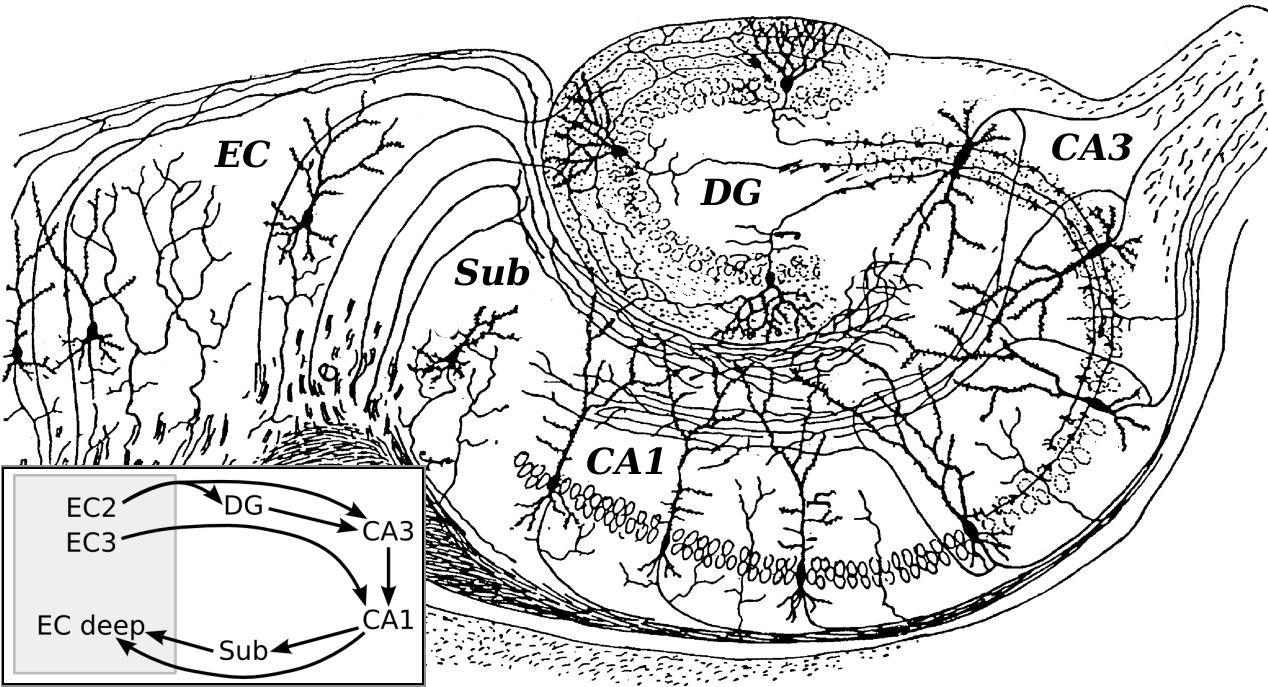

In [7]:
IPython.display.Image("CajalHippocampus.png")

# Background 
## on image. 
* relevant to epilpsy.
* representative. 
* long recording history, understood early on link to memory

In [ ]:
#russell made small world network using networkx. parameters include neighbor connections: mean of the out degree + mean of in degree
#connections aren't random in the brain, just incomprehensible

# contrast with matrix view, heat map
# variability of spike trains
# network color coded for heat for CV
#prune neurons that don't have connections

Not just a final results analysis, these visualisations are sanity checks of the model, and they help inform model design.

This work subserves multiple functions, I will keep using it as pipeline/tool to prototype and debug biologically informed neuronal networks, as a way of speeding up development.